# Regresión Logística

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

data_path = '../data/'

### Cargar, preprocesar y visualizar de los datos

Las primeras dos collumnas representan los resultados de dos exámenes. La tercera columna representa si el estudiante fue admitido (1) o no (0).

In [3]:
# Load data
data = pd.read_csv(data_path + '02_studentadmissions.csv', delimiter=';')
data.head()

,Test1,Test2,Admission
0,"34,62365962","78,02469282",0
1,"30,28671077","43,89499752",0
2,"35,84740877","72,90219803",0
3,"60,18259939","86,3085521",1
4,"79,03273605","75,34437644",1


El tipo de los datos en las columnas Test1 y Test2 debería ser float, y el tipo de la columna Admission debería ser int. 

Sin embargo, al cargar los datos, Pandas los carga como tipo object. Por lo tanto, es necesario convertirlos a los tipos correctos.

In [4]:
# print type of data in each column
data.dtypes

Test1        object
Test2        object
Admission     int64
dtype: object

In [5]:
# In columns 'Test1' and 'Test2' there replace ',' to '.'
data['Test1'] = data['Test1'].str.replace(',','.')
data['Test2'] = data['Test2'].str.replace(',','.')

# change the type of data in the column 'Test1' and 'Test2' to float
data['Test1'] = data['Test1'].astype(float)
data['Test2'] = data['Test2'].astype(float)

In [6]:
data.head()

,Test1,Test2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
data.dtypes

Test1        float64
Test2        float64
Admission      int64
dtype: object

In [8]:
data.shape

(100, 3)

In [9]:
# Separar los datos en X (variables independientes) e y (variable dependiente)
X = data[['Test1', 'Test2']]
y = data['Admission']

# Número de muestras
m = len(y)

# Añadimos una columna de 1's a X para el término independiente
X = np.hstack((np.ones((m, 1)), X))

# Número de factores
n = np.size(X, 1)

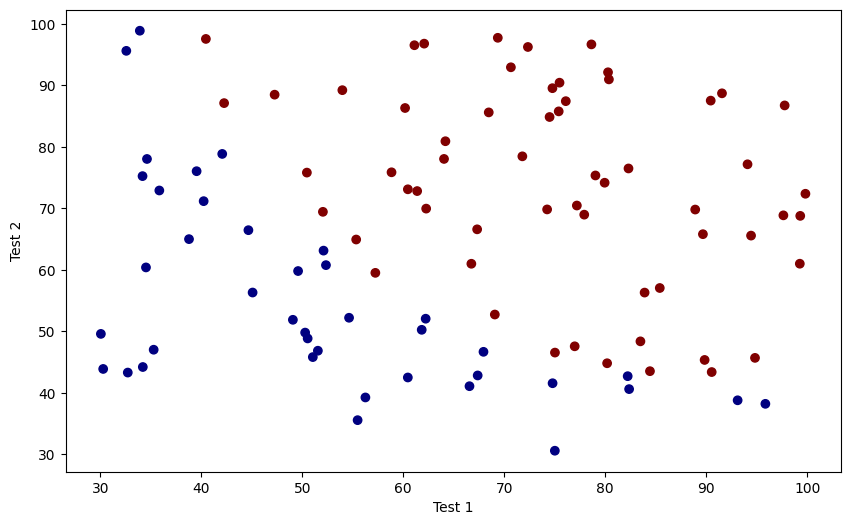

In [10]:
# Visualizar los datos, scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='jet')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.show()


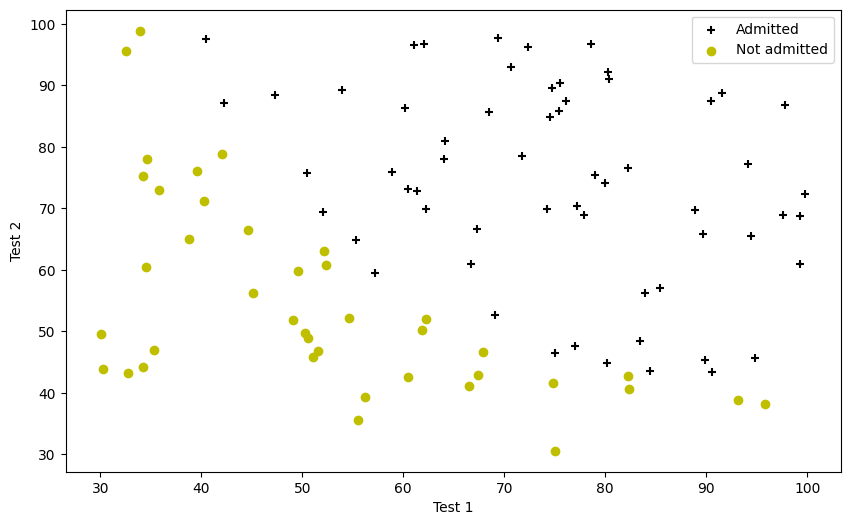

In [11]:
# Alternative visualization, + for admitted, o for not admitted
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.figure(figsize=(10, 6))
plt.scatter(X[pos, 1], X[pos, 2], c='k', marker='+', label='Admitted')
plt.scatter(X[neg, 1], X[neg, 2], c='y', marker='o', label='Not admitted')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(loc = 'upper right')
plt.show()


### Algoritmo para regresión logística

Comenzamos inicializando los parámetros del modelo a cero.

$$\theta = \begin{bmatrix} 0 \\ 0 \\ 0 \end{bmatrix}$$

Luego, implementamos la función sigmoide, definida como:

$$g(z) = \frac{1}{1 + e^{-z}}$$

Recordemos que nuestra hipótesis en regresión logística es definida como:

$$h_\theta(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$$

In [13]:
# Inicializr vector de parámetros theta
theta0 = np.zeros(n)
theta0

array([0., 0., 0.])

In [14]:
# Definiendo la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


Definimos la función de coste según la fórmula:

$$J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))]$$

In [15]:
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = -1.0 / m * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    grad = 1.0 / m * (X.T.dot(h - y))
    return J, grad

In [16]:
# Calculamos el coste y el gradiente con theta inicializado a 0
coste, gradiente = costFunction(theta0, X, y)
print('Coste con theta inicializado a 0: ', coste)
print('Gradiente con theta inicializado a 0: ', gradiente)


Coste con theta inicializado a 0:  0.6931471805599453
Gradiente con theta inicializado a 0:  [ -0.1        -12.00921659 -11.26284221]


In [17]:
# Optimización de theta con scipy.optimize.minimize
res = minimize(costFunction, theta0, args=(X,y), method=None, jac=True, options={'maxiter':400, 'disp':True})

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 23
         Function evaluations: 31
         Gradient evaluations: 31


C:\Users\icira\AppData\Local\Temp\ipykernel_15800\2546603557.py:4: RuntimeWarning: divide by zero encountered in log
  J = -1.0 / m * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))


In [18]:
# Coste y theta óptimos
costeOptimo = res.fun
thetaOptimo = res.x

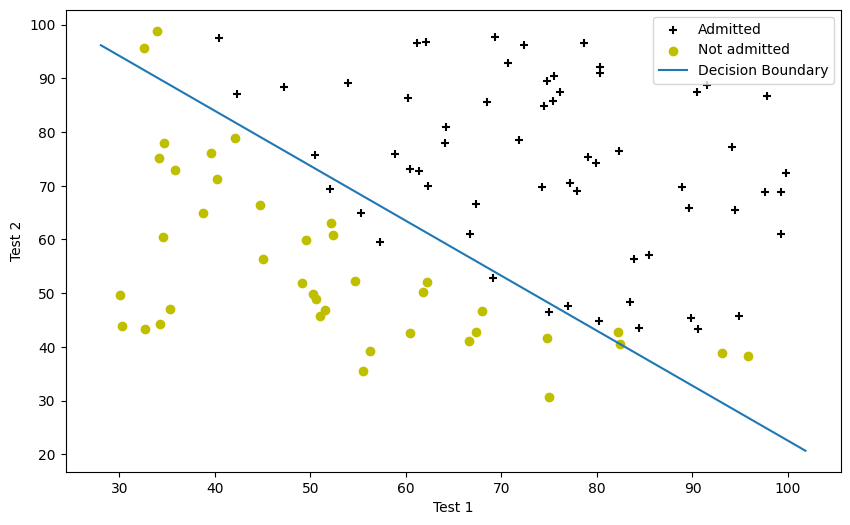

In [19]:
# Visualizar los datos, scatter plot, y el límite de decisión
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.figure(figsize=(10, 6))
plt.scatter(X[pos, 1], X[pos, 2], c='k', marker='+', label='Admitted')
plt.scatter(X[neg, 1], X[neg, 2], c='y', marker='o', label='Not admitted')

# Límite de decisión
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
plot_y = (-1.0 / thetaOptimo[2]) * (thetaOptimo[1] * plot_x + thetaOptimo[0])
plt.plot(plot_x, plot_y, label='Decision Boundary')

plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(loc = 'upper right')
plt.show()


### Predicción

In [20]:
# Predecir probabilidad de admisión para un estudiante con notas 45 y 85
prob = sigmoid(np.array([1, 45, 85]).dot(thetaOptimo))
print('Probabilidad de admisión para un estudiante con notas 45 y 85: ', prob)

Probabilidad de admisión para un estudiante con notas 45 y 85:  0.7762907240554386


In [21]:
# Calculo de la precisión del clasificador
# Probabilidades >= 0.5 se consideran clase 1 (admitido)
p = sigmoid(X.dot(thetaOptimo)) >= 0.5
print('Precisión del clasificador: ', np.mean(p == y) * 100)


Precisión del clasificador:  89.0


# Regresión logística con características polinómicas y regularización

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import minimize
from scipy.special import expit as sigmoid
%matplotlib inline

data_path = '../data/'

### Carga, preprocesamiento y visualización de datos

Las dos primeras columnas representan los resultados de dos tests pasados a los chips. La tercera columna representa si el chip fue aceptado (1) o no (0).

In [23]:
# Load data
data = pd.read_csv(data_path + '02_microchips.csv', delimiter=';')
data.head()

,Test1,Test2,ChipOK
0,"0,051267","0,69956",1
1,"-0,092742","0,68494",1
2,"-0,21371","0,69225",1
3,"-0,375","0,50219",1
4,"-0,51325","0,46564",1


In [24]:
# print type of data in each column
data.dtypes

Test1     object
Test2     object
ChipOK     int64
dtype: object

In [25]:
# In columns 'Test1' and 'Test2' there replace ',' to '.'
data['Test1'] = data['Test1'].str.replace(',','.')
data['Test2'] = data['Test2'].str.replace(',','.')

# change the type of data in the column 'Test1' and 'Test2' to float
data['Test1'] = data['Test1'].astype(float)
data['Test2'] = data['Test2'].astype(float)

In [26]:
data.head()

,Test1,Test2,ChipOK
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [27]:
data.dtypes

Test1     float64
Test2     float64
ChipOK      int64
dtype: object

In [28]:
data.shape

(118, 3)

Preparamos los datos, pero en esta ocasión no añadimos una columna de unos, ya que la función de coste de la regresión logística regularizada añade una columna de unos por nosotros.

In [30]:
# Separar los datos en X (variables independientes) e y (variable dependiente)
X = data[['Test1', 'Test2']]
y = data['ChipOK']

# X to numpy
X = X.values
y = y.values

# Número de muestras
m = len(y)

# Añadimos una columna de 1's a X para el término independiente
#X = np.hstack((np.ones((m, 1)), X))

# Número de factores
n = np.size(X, 1)

X.shape,y.shape,m

((118, 2), (118,), 118)

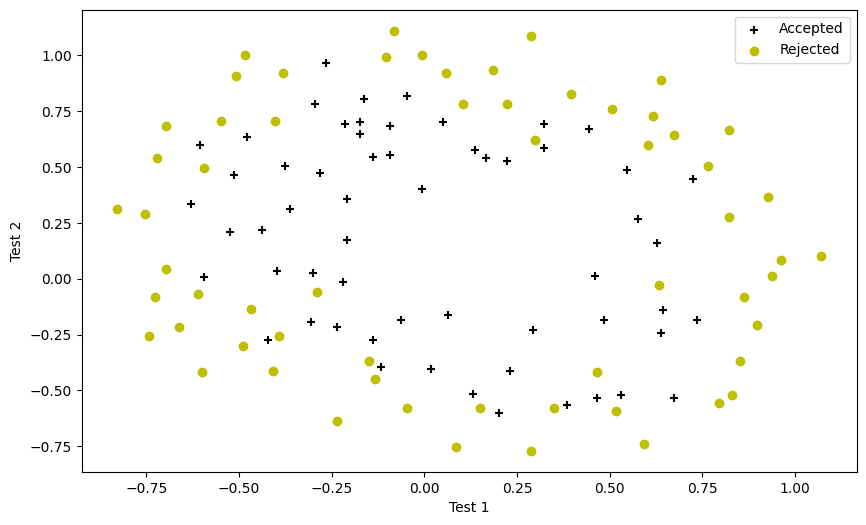

In [31]:
# Alternative visualization, + for admitted, o for not admitted
pos = np.where(y == 1)
neg = np.where(y == 0)
plt.figure(figsize=(10, 6))

plt.scatter(X[pos, 0], X[pos, 1], c='k', marker='+', label='Accepted')
plt.scatter(X[neg, 0], X[neg, 1], c='y', marker='o', label='Rejected')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend(loc = 'upper right')
plt.show()

Mapeamos las características en todos los términos polinómicos de $x_1$ y $x_2$ hasta el sexto poder.

Con esto nuestras características en función de x1 y x2 serán:

$$\begin{align*} &x_1 \\ &x_2 \\ &x_1^2 \\ &x_1 x_2 \\ &x_2^2 \\ &x_1^3 \\ &\vdots \\ &x_1 x_2^5 \\ &x_2^6 \end{align*}$$

In [32]:
def mapFeature(X1,X2):
    degree = 6
    X_new = np.ones((X1.size,1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            temp = X1**(i-j) * X2**j
            X_new = np.hstack((X_new,temp.reshape(-1,1)))
    return X_new

In [33]:
X_new = mapFeature(X[:, 0], X[:, 1])
r, c = X_new.shape
r, c

(118, 28)

### Preparar algoritmo de regresión logística con regularización

In [35]:
# Inicializar vector de parámetros theta
theta0 = np.zeros(c)
theta0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Preparamos la función de coste regularizada, definida como:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [-y^{(i)} \log(h_\theta(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$$

In [36]:
# Cost Function and Gradient for Regularized Logistic Regression
# Note : We do not regularize Theta[0] (bias term)
def costFunction(t,X,y,lamb):
    m = y.size
    h = sigmoid(X.dot(t))
    J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))                         
    grad = (1.0/m)*((X.T).dot(h-y))
    reg_term = np.r_[0,(lamb/float(m) * t[1:])]
    grad = grad+reg_term
  
    return J,grad  

In [41]:
# Coste inicial y gradiente
coste, gradiente = costFunction(theta0, X_new, y, 1)
print('Coste con theta inicializado a 0: ', coste)
print('Gradiente con theta inicializado a 0: ', gradiente)

print()
print("-"*80)
print()

# Con theta = 1s
coste, gradiente = costFunction(np.ones(c), X_new, y, 10)
print('Coste con theta inicializado a 1s: ', coste)
print('Gradiente con theta inicializado a 1s: ', gradiente)

Coste con theta inicializado a 0:  0.6931471805599454
Gradiente con theta inicializado a 0:  [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]

--------------------------------------------------------------------------------

Coste con theta inicializado a 1s:  3.1645093316150095
Gradiente con theta inicializado a 1s:  [0.34604507 0.16135192 0.19479576 0.22686278 0.09218568 0.24438558
 0.14339212 0.10844171 0.10231439 0.18346846 0.17353003 0.08725552
 0.11822776 0.0858433  0.19994895 0.13522653 0.09497527 0.09356441
 0.09979784 0.09140157 0.17485242 0.14955442 0.08678566 0.09897686
 0.08531951 0.10190666 0.08450198

In [42]:
# Función para obtener los parámetros theta usando scipy.optimize 
def find_min(init_theta,X_new,y,lamb):
    res = minimize(costFunction,init_theta,args=(X_new,y,lamb),method = 'BFGS',jac = True
               ,options={'disp':True})  
    return res.x

### Visualización de los resultados

Para poder hacer varias pruebas y visualizar los resultados, preparamos una función que nos da un rango de valores de z, recordemos que z es la variable de la función sigmoide:

$$z = \theta^T x$$

In [43]:
# Evaluating z = x*theta over the grid
def eval_z(u,v,theta):
    z = np.zeros((u.size,v.size))
    for (i,j),val in np.ndenumerate(z):
        z[i,j] = mapFeature(u[i],v[j]).dot(theta)
    return z

In [44]:
# Plotting with the decision boundary
def plotBoundary(X,y,xx,yy,z):
    pos = np.nonzero(y==1)
    neg = np.nonzero(y==0)
    plt.figure(figsize=(9,6),dpi=80)
    P1 = plt.scatter(X[pos,0],X[pos,1],c='k',marker='+',label = "Accepted")
    P2 = plt.scatter(X[neg,0],X[neg,1],c='y',marker='o',label = "Rejected")
    plt.xlim(xmin = -1, xmax = 1.25)
    plt.ylim(ymin=-1, ymax=1.25)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.contour(xx,yy,z,[0],colors='g')
    green_patch = mpatches.Patch(color='green', label='Decison Boundary')
    plt.legend(handles=[P1,P2,green_patch],loc='upper right')
    

### Resolución con lambda = 1

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


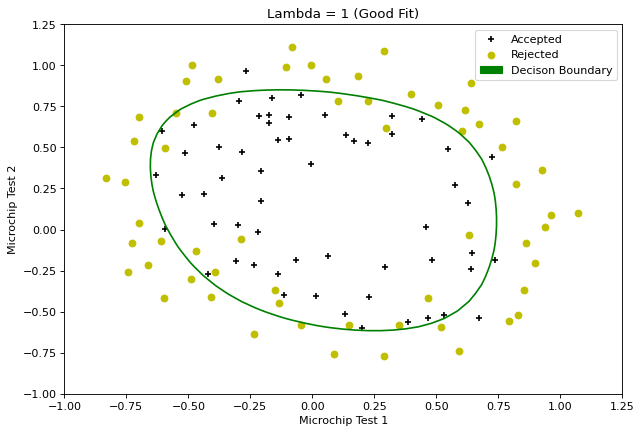

Accuracy on the Training Set with Lambda = 1 :  83.05084745762711 %


In [46]:
# Específicar lambda = 1
lamb = 1

# Encontrar los parámetros óptimos
theta1 = find_min(theta0, X_new, y, lamb)

# Inicializar la red
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
xx, yy = np.meshgrid(u, v, indexing='ij')

print(type(theta1))
print(type(u))
print(type(v))

# Plotting the decision boundary
z1 = eval_z(u,v,theta1)
plotBoundary(X,y,xx,yy,z1)
plt.title("Lambda = 1 (Good Fit)")
plt.show()
# Computing the accuracy of the classifier on the Training Set
# Probabilities >= 0.5 are considered 1 and the rest 0
p = (X_new.dot(theta1) >= 0)
accuracy = np.mean(p == y)*100
print("Accuracy on the Training Set with Lambda = 1 : ",accuracy,"%")


### Resolución con lambda = 0

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547


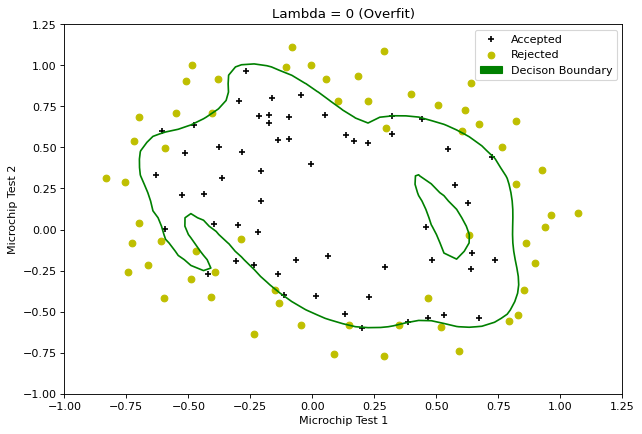

Train Accuracy with Lambda = 0 :  91.52542372881356 %


In [186]:
# Same with lambda = 0
lamb = 0

# Finding the optimal parameters
theta2 = find_min(theta0,X_new,y,lamb)

# Plotting the decision boundary
z2 = eval_z(u,v,theta2)
plotBoundary(X,y,xx,yy,z2)
plt.title("Lambda = 0 (Overfit)")
plt.show()

# Computing the accuracy of the classifier on the Training Set
# Probabilities >= 0.5 are considered 1 and the rest 0
p = (X_new.dot(theta2) >= 0)
accuracy = np.mean(p == y)*100
print("Train Accuracy with Lambda = 0 : ",accuracy,"%")


### Resolución con lambda = 100

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8


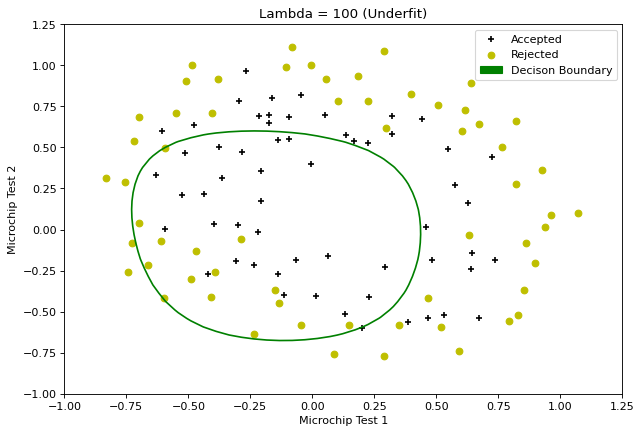

Train Accuracy with Lambda = 100 :  61.016949152542374 %


In [47]:
# Same with lambda = 100
lamb = 100

# Finding the optimal parameters
theta3 = find_min(theta0,X_new,y,lamb)

# Plotting the decision boundary
z3 = eval_z(u,v,theta3)
plotBoundary(X,y,xx,yy,z3)
plt.title("Lambda = 100 (Underfit)")
plt.show()

# Computing the accuracy of the classifier on the Training Set
# Probabilities >= 0.5 are considered 1 and the rest 0
p = (X_new.dot(theta3) >= 0)
accuracy = np.mean(p == y)*100
print("Train Accuracy with Lambda = 100 : ",accuracy,"%")

# Reconocimiento de dígitos escritos a mano, one-vs-all logistic regression

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit as sigmoid

### Carga de datos y visualización

El dataset contiene 5000 muestras del dataset MNIST. Cada muestra es una imagen de 20x20 píxeles. Cada píxel es representado por un número real indicando la intensidad del color en escala de grises.
 

In [49]:
data = np.load(data_path + '02_handwritten_digits.npz')
data.files

['labels', 'data']

In [50]:
y = data['labels']
m = y.size 
X = data['data']
# Adding the columns of one for the intercept 
X = np.c_[np.ones(m),X]

num_labels = np.unique(y).size
X.shape,num_labels

((5000, 401), 10)

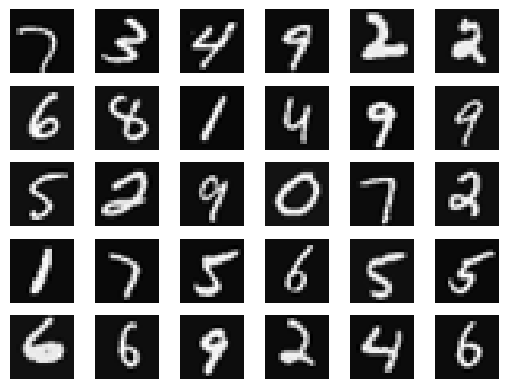

In [51]:
# Plotting 30 random examples from X
indices = np.random.randint(0,m,30)

fig=plt.figure()
for i in range (30):
    img = X[indices[i],1:].reshape(20,20,order='F')
    fig.add_subplot(5,6,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis("off")

plt.show()

### Preparación del algoritmo

In [52]:
# Cost Function and Gradient for Regularized Logistic Regression
# Note : We do not regularize Theta[0] (bias term)
def costFunction(t,X,y,lamb):
    m = y.size
    h = sigmoid(X.dot(t))
    J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))                         
    grad = (1.0/m)*((X.T).dot(h-y))
    reg_term = np.r_[0,((lamb/float(m)) * t[1:])]
    grad = grad+reg_term
  
    return J,grad  

In [53]:
# Computing the Cost and Gradient on sample values
theta_t = np.array([-2,-1,1,2])
X_t = np.hstack((np.ones((5,1)),np.arange(1,16).reshape(5,3,order='F')/10.0))
y_t = np.array([1,0,1,0,1])
lamb_t = 3
J,G = costFunction(theta_t,X_t,y_t,lamb_t)
print("Cost: ", J)
print("Gradient: ", G)

Cost:  2.534819396109744
Gradient:  [ 0.14656137 -0.54855841  0.72472227  1.39800296]


In [54]:
# Optimizing the parameters theta using scipy.optimize 
def find_min(init_theta,X,y,lamb):
    res = minimize(costFunction,init_theta,args=(X,y,lamb),method = 'CG',jac = True
               ,options={'maxiter':150,'disp':True})  
    return res.x

In [55]:
# oneVsAll trains multiple logistic regression classifiers and returns all
# the classifiers in a matrix theta_mat, where the i-th row of theta_mat 
# corresponds to the classifier for label i
def oneVsAll(X,y,num_labels,lamb):
    m,n = X.shape
    theta_mat = np.empty([num_labels,n])
    for i in range(num_labels):
        print(f"Class: {i}")
        y_temp = (y == i).astype(int)
        init_theta = np.random.rand(n)
        init_theta = find_min(init_theta,X,y_temp,lamb)
        theta_mat[i,:] = init_theta
    return theta_mat

### Resolución y visualización

In [56]:
# Training One-vs-All Logistic Regression
lamb = 0.1
theta_mat = oneVsAll(X,y,num_labels,lamb)

Class: 0


C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))


Optimization terminated successfully.
         Current function value: 0.008576
         Iterations: 100
         Function evaluations: 399
         Gradient evaluations: 399
Class: 1


C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))


Optimization terminated successfully.
         Current function value: 0.013124
         Iterations: 115
         Function evaluations: 459
         Gradient evaluations: 459
Class: 2


C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minimize.py:703: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-

         Current function value: 0.050906
         Iterations: 150
         Function evaluations: 474
         Gradient evaluations: 474
Class: 3


c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minimize.py:703: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))


         Current function value: 0.057711
         Iterations: 150
         Function evaluations: 464
         Gradient evaluations: 464
Class: 4


c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minimize.py:703: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))


         Current function value: 0.033211
         Iterations: 150
         Function evaluations: 511
         Gradient evaluations: 511
Class: 5


c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minimize.py:703: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))


         Current function value: 0.054735
         Iterations: 150
         Function evaluations: 454
         Gradient evaluations: 454
Class: 6
Optimization terminated successfully.
         Current function value: 0.018271
         Iterations: 139
         Function evaluations: 522
         Gradient evaluations: 522
Class: 7


C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))


Optimization terminated successfully.
         Current function value: 0.030681
         Iterations: 149
         Function evaluations: 514
         Gradient evaluations: 514
Class: 8


C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minimize.py:703: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: divide by zero encountered in log
  J = ((-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))) + ((lamb/(2.0*m)) * sum(t[1:]**2))
C:\Users\icira\AppData\Local\Temp\ipykernel_15800\4166137054.py:6: RuntimeWarning: invalid value encountered in multiply
  J = ((-

         Current function value: 0.078912
         Iterations: 150
         Function evaluations: 418
         Gradient evaluations: 418
Class: 9
         Current function value: 0.071611
         Iterations: 150
         Function evaluations: 437
         Gradient evaluations: 437


c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minimize.py:703: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_cg(fun, x0, args, jac, callback, **options)


### Predicción

Con los parámetros $\theta$ entrenados, podemos usarlos para predecir la etiqueta de una imagen. Para ello, calculamos la hipótesis para cada etiqueta y elegimos la etiqueta con la hipótesis más grande.

In [57]:
# Predicting labels 
def predictOneVsAll(X,theta_mat):
    temp = sigmoid(X.dot(theta_mat.T))
    label = np.argmax(temp,axis = 1)
    return label

In [58]:
# Predicting Accuracy on the training set
y_predict = predictOneVsAll(X,theta_mat)
accuracy = np.mean(y == y_predict) *100
print(f"Accuracy on the Training Set: {round(accuracy,2)}")
print(f"Logistic Regression made errors in predicting { np.count_nonzero(y != y_predict)} samples out of 5000 in the training set ")    

Accuracy on the Training Set: 96.36
Logistic Regression made errors in predicting 182 samples out of 5000 in the training set 


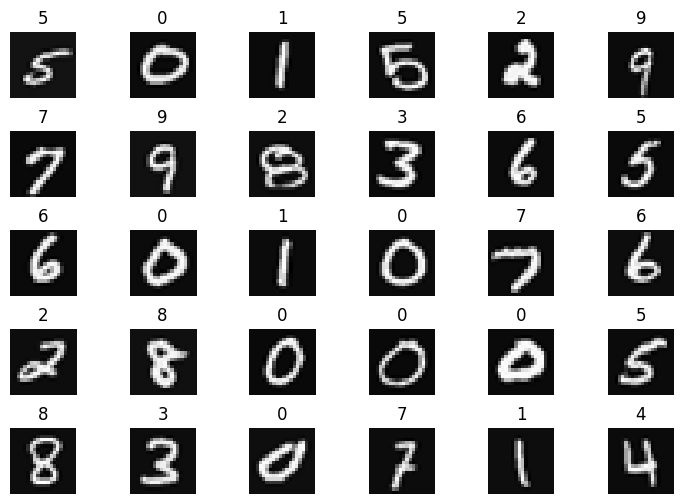

In [59]:
# Plotting 30 random examples from X with their predicted labels
indices = np.random.randint(0,m,30)

fig = plt.figure(figsize = (9,6))

for i in range (30):
    img = X[indices[i],1:].reshape(20,20,order='F')
    fig.add_subplot(5,6,i+1)    
    plt.title(y_predict[indices[i]])
    plt.imshow(img,cmap='gray')
    plt.axis("off")

plt.subplots_adjust(hspace = 0.5)    
plt.show()